# material about `Load`

- [理解Linux系统负荷 - ruanyifeng.com](https://www.ruanyifeng.com/blog/2011/07/linux_load_average_explained.html)
- [Load和CPU利用率是如何算出来的 | P.Linux Laboratory](http://www.penglixun.com/tech/system/how_to_calc_load_cpu.html)
- Load computation - wikipedia: https://en.wikipedia.org/wiki/Load_(computing)

## System load is updated every 5 seconds?

Check the load update by below command:

```bash
while true; do
    echo "$(date +"%H:%M:%S.%N") $(uptime | awk -F': ' '{print $2}')"
    sleep 0.97
done | cat -n
```

Output on my dev computer(you can check on your machine):

```
     1  13:57:57.130513000 3.24 3.08 2.99
     2  13:57:58.128097000 3.24 3.08 2.99
     3  13:57:59.134787000 3.24 3.08 2.99
     4  13:58:00.132729000 3.06 3.05 2.98 // UPDATED
     5  13:58:01.135952000 3.06 3.05 2.98
     6  13:58:02.134767000 3.06 3.05 2.98
     7  13:58:03.138723000 3.06 3.05 2.98
     8  13:58:04.140451000 3.06 3.05 2.98
     9  13:58:05.138883000 2.90 3.01 2.96 // UPDATED
    10  13:58:06.140727000 2.90 3.01 2.96
    11  13:58:07.141673000 2.90 3.01 2.96
    12  13:58:08.149648000 2.90 3.01 2.96
    13  13:58:09.151213000 2.90 3.01 2.96
    14  13:58:10.155848000 2.91 3.01 2.96 // UPDATED
    15  13:58:11.158308000 2.91 3.01 2.96
    16  13:58:12.162005000 2.91 3.01 2.96
    17  13:58:13.158733000 2.91 3.01 2.96
    18  13:58:14.158900000 2.91 3.01 2.96
    19  13:58:15.159112000 2.75 2.98 2.95 // UPDATED
    20  13:58:16.155540000 2.75 2.98 2.95
    21  13:58:17.153301000 2.75 2.98 2.95
    22  13:58:18.154856000 2.75 2.98 2.95
    23  13:58:19.154397000 2.75 2.98 2.95
    24  13:58:20.154855000 2.61 2.94 2.94 // UPDATED
    25  13:58:21.156046000 2.61 2.94 2.94
    26  13:58:22.153694000 2.61 2.94 2.94
    27  13:58:23.158866000 2.61 2.94 2.94
    28  13:58:24.159183000 2.61 2.94 2.94
    29  13:58:25.163565000 2.56 2.93 2.94 // UPDATED
    30  13:58:26.159302000 2.56 2.93 2.94
```

In [1]:
import load

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from numpy.random import randint

def plot_task_count_and_load(task_count):
    plt.rcParams['savefig.dpi'] = 250
    plt.rcParams['figure.dpi'] = 250

    # Specifying Colors
    # https://matplotlib.org/3.1.0/tutorials/colors/colors.html

    x = np.arange(0, len(task_count) * 5, 5) # Load get task_count every 5 seconds
    plt.scatter(x, task_count, label='Task Count', color='C1', s=8)
    load1s = load.load1s(task_count=task_count)
    load5s = load.load5s(task_count=task_count)
    load15s = load.load15s(task_count=task_count)
    plt.plot(x, load1s, label='Load 1', color='C2')
    plt.plot(x, load5s, label='Load 5', color='C4')
    plt.plot(x, load15s, label='Load 15', color='C3')

    plt.grid(alpha=.4, linestyle='--')
    plt.legend()

    plt.xlabel('Timeline(second)')

    plt.show()

    # return np.stack((x, task_count, load1s), axis=-1)

## For random task count is in [8, 12], load **_should_** approach to 10.

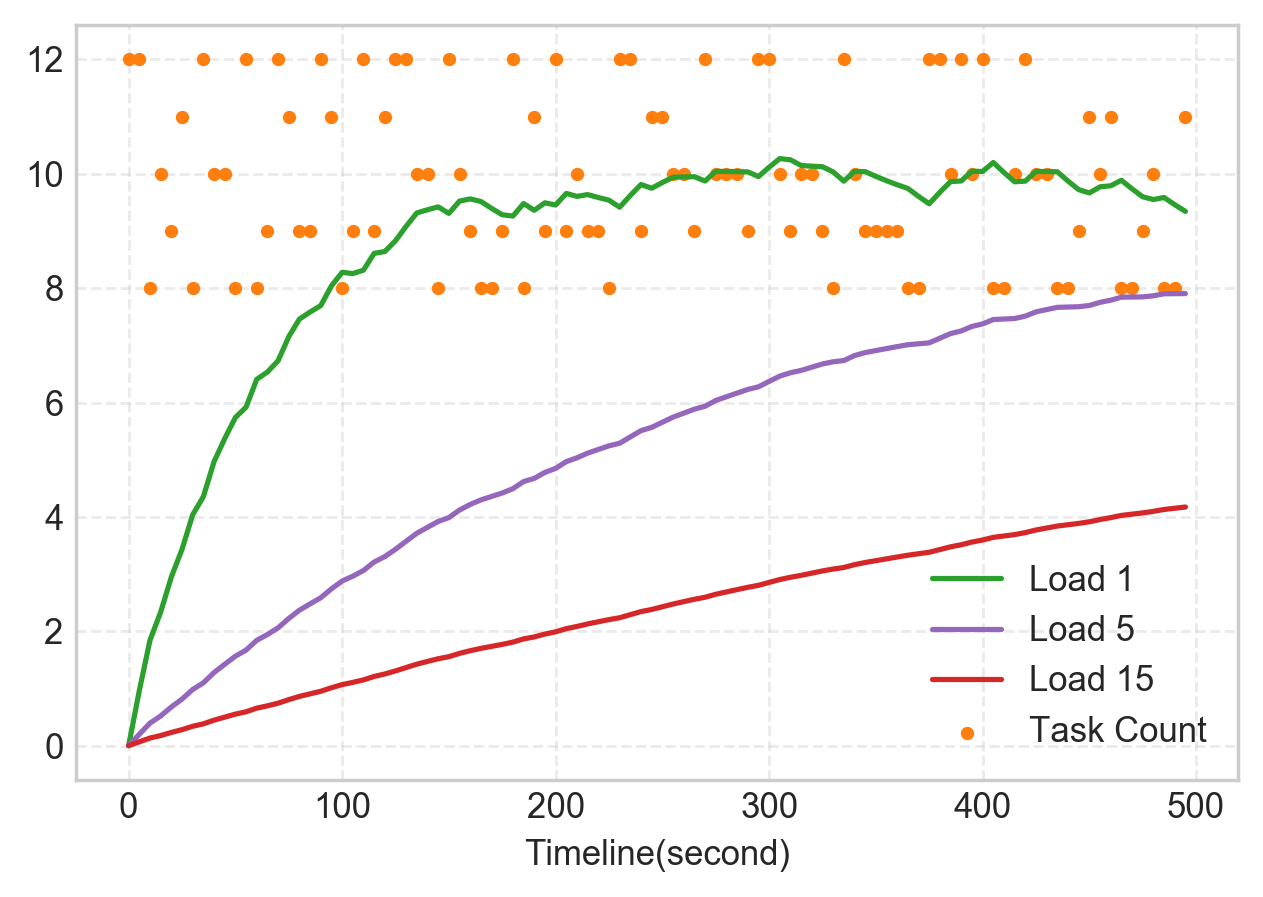

In [2]:
plot_task_count_and_load(task_count=randint(8, 13, 100))

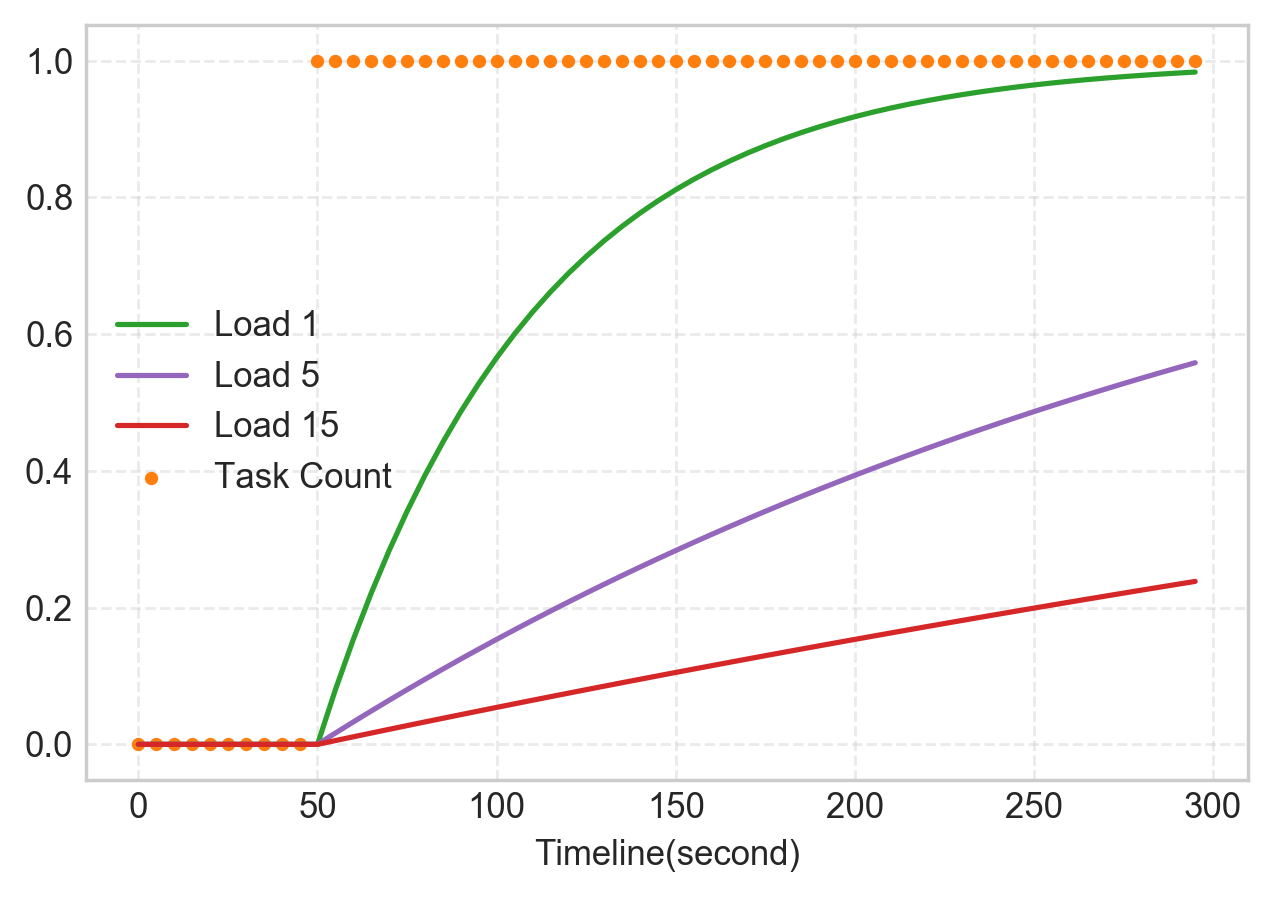

In [3]:
plot_task_count_and_load(task_count=np.append(np.zeros(10), np.ones(50)))

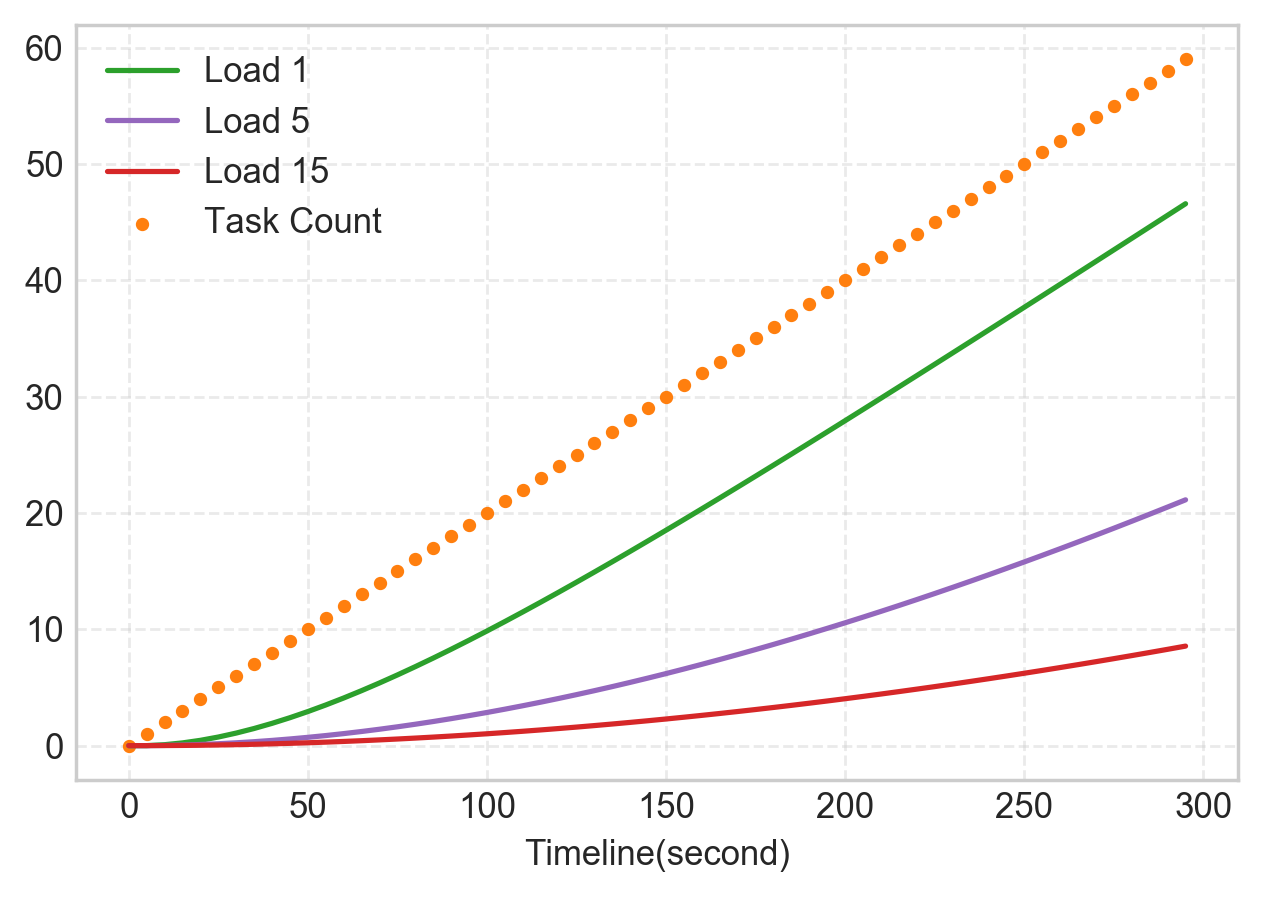

In [4]:
plot_task_count_and_load(task_count=np.arange(60))

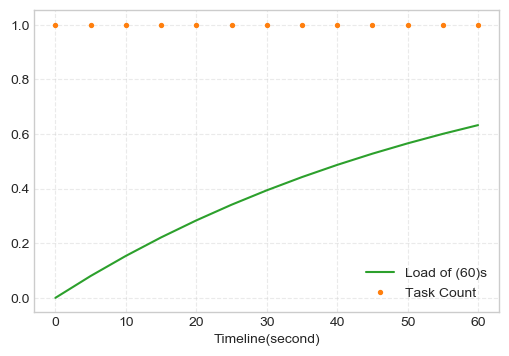

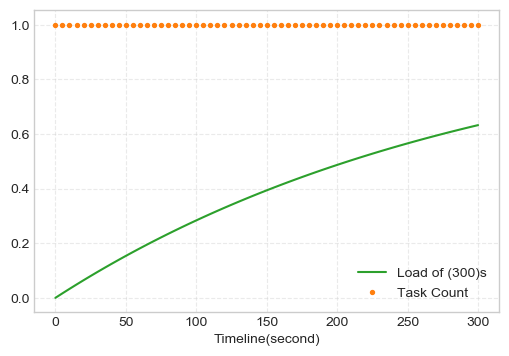

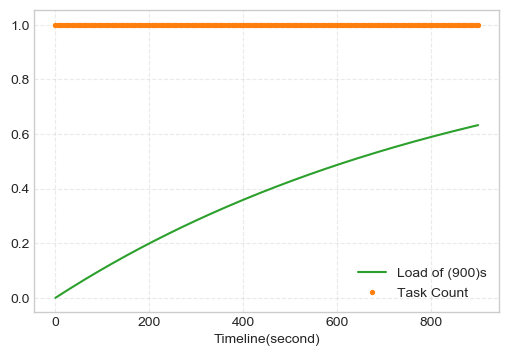

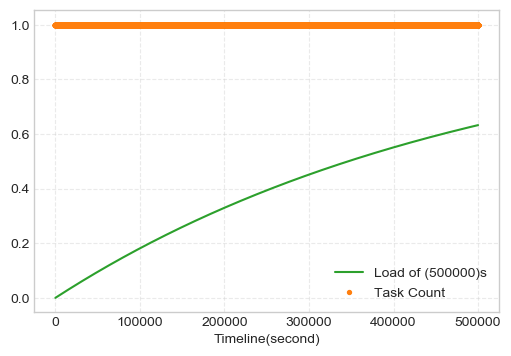

In [5]:
def plot_task_count_and_load_of_load_period(load_period):
    plt.rcParams['savefig.dpi'] = 100
    plt.rcParams['figure.dpi'] = 100

    update_period=5
    task_count_num = load_period // update_period + 1
    x = np.arange(0, task_count_num * update_period, update_period)

    task_count = np.ones(task_count_num)
    
    plt.scatter(x, task_count, label='Task Count', color='C1', s=8)
    loads = load.loads(task_count, load_period)
    plt.plot(x, loads, label=f'Load of ({load_period})s', color='C2')

    plt.grid(alpha=.4, linestyle='--')
    plt.legend()

    plt.xlabel('Timeline(second)')

    plt.show()

    return np.stack((x, task_count, loads), axis=-1)
    
r1 = plot_task_count_and_load_of_load_period(60)
r5 = plot_task_count_and_load_of_load_period(5 * 60)
r15 = plot_task_count_and_load_of_load_period(15 * 60)
r_big = plot_task_count_and_load_of_load_period(5 * 100_000)

In [6]:
half_life_proportion = 0.693
# half_life_proportion = 1 - 1 / np.pi # 0.6816901138162093
# half_life_proportion = 1 - 1 / np.e # 0.6321205588285577
# half_life_proportion = (math.sqrt(5) - 1) / 2 # 0.6180339887498949
def get_half_life_proportion(r):
    half_life_idx = round(half_life_proportion * len(r))
    half_life_load = r[half_life_idx][2]

    return (half_life_load, half_life_idx, len(r))


print(f'{half_life_proportion = }'
      f'\n{get_half_life_proportion(r1)}'
      f'\n{get_half_life_proportion(r5)}'
      f'\n{get_half_life_proportion(r15)}'
      f'\n{get_half_life_proportion(r_big)}'
     )

half_life_proportion = 0.693
(0.5276334472589851, 9, 13)
(0.5034146962085906, 42, 61)
(0.5006482114007251, 125, 181)
(0.49993140501538247, 69301, 100001)
